<h2 style='color:blue' align='center'>Small Image Classification Using Convolutional Neural Network (CNN)</h2>

In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

<img src="small_images.jpg" />

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

## needed to load cifar10 dataset
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

<h4 style="color:purple">Load the dataset</h4>

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are 

In [9]:
def plot_sample(X, y, index, label=""):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    if label:
        plt.title(label)
    plt.xlabel(classes[y[index]])

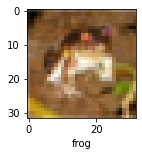

In [10]:
plot_sample(X_train, y_train, 0)

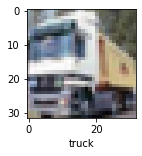

In [11]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

<h4 style="color:purple">Normalizing the training data</h4>

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<h4 style="color:purple">Build simple artificial neural network for image classification</h4>

In [13]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 3s 1ms/step - loss: 1.9021 - accuracy: 0.3169
Epoch 2/5
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7372 - accuracy: 0.3857
Epoch 3/5
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6655 - accuracy: 0.4136
Epoch 4/5
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6150 - accuracy: 0.4295
Epoch 5/5
1563/1563 [==============================] - 2s 1ms/step - loss: 1.5779 - accuracy: 0.4449


**You can see that at the end of 5 epochs, accuracy is at around 49%**

In [14]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.54      0.41      0.47      1000
           1       0.67      0.37      0.48      1000
           2       0.38      0.14      0.21      1000
           3       0.32      0.29      0.30      1000
           4       0.34      0.46      0.39      1000
           5       0.46      0.25      0.33      1000
           6       0.39      0.67      0.49      1000
           7       0.66      0.27      0.38      1000
           8       0.38      0.79      0.51      1000
           9       0.42      0.56      0.48      1000

    accuracy                           0.42     10000
   macro avg       0.46      0.42      0.40     10000
weighted avg       0.46      0.42      0.40     10000



<h4 style="color:purple">Now let us build a convolutional neural network to train our images(check comments)</h4>

In [79]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3),padding="same", activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3),padding="same", activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(), # don't need to specify input shape
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [80]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [81]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.4363 - accuracy: 0.4869
Epoch 2/10
1563/1563 [==============================] - 43s 27ms/step - loss: 1.0584 - accuracy: 0.6286
Epoch 3/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.9225 - accuracy: 0.6778
Epoch 4/10
1563/1563 [==============================] - 46s 30ms/step - loss: 0.8361 - accuracy: 0.70960s - l
Epoch 5/10
1563/1563 [==============================] - 46s 30ms/step - loss: 0.7679 - accuracy: 0.7318
Epoch 6/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.7095 - accuracy: 0.7535
Epoch 7/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.6557 - accuracy: 0.7708
Epoch 8/10
1563/1563 [==============================] - 43s 28ms/step - loss: 0.6006 - accuracy: 0.7907
Epoch 9/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.5615 - accuracy: 0.8028
Epoch 10/10
1563/1563 [==============================] - 4

**With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [82]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.9427 - accuracy: 0.7029


[0.9426560401916504, 0.7028999924659729]

In [83]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[5.3676101e-04, 9.7134436e-04, 3.0398241e-04, 8.8116992e-01,
        1.3763153e-05, 3.8828336e-02, 8.0926264e-05, 7.0289497e-07,
        7.8001037e-02, 9.3225004e-05],
       [1.3322812e-03, 2.8018408e-02, 2.7662271e-08, 6.6737548e-06,
        9.8429140e-09, 2.3451615e-07, 3.7274347e-06, 2.2600812e-08,
        9.6759474e-01, 3.0439051e-03],
       [1.8068825e-01, 5.7885055e-03, 4.3950286e-02, 4.3756045e-02,
        2.4592774e-02, 3.1112514e-03, 2.6878673e-03, 1.7060059e-01,
        4.7588053e-01, 4.8943870e-02],
       [8.1404030e-01, 1.4556253e-03, 1.6162445e-01, 2.9193048e-04,
        5.3525233e-05, 7.6519420e-05, 5.1144592e-04, 7.2474186e-06,
        2.1921990e-02, 1.6888882e-05],
       [6.1010387e-06, 1.7269139e-06, 6.5803686e-03, 1.4703519e-02,
        3.1823558e-01, 9.6018389e-03, 6.5084517e-01, 2.1258518e-05,
        3.7922116e-06, 6.5700902e-07]], dtype=float32)

In [84]:
y_pred = [np.argmax(element) for element in y_pred]
y_pred[:5]

[3, 8, 8, 0, 6]

In [85]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

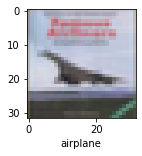

In [86]:
plot_sample(X_test, y_test,3)

In [87]:
classes[y_pred[3]]

'airplane'

In [88]:
classes[y_pred[3]]

'airplane'

Image #:370
Image #:765
Image #:713
Image #:266
Image #:235
Image #:598
Image #:655
Image #:295
Image #:805
Image #:574
Image #:965
Image #:345
Image #:715
Image #:157
Image #:524
Image #:866
Image #:736
Image #:423
Image #:487
Image #:907
Image #:906


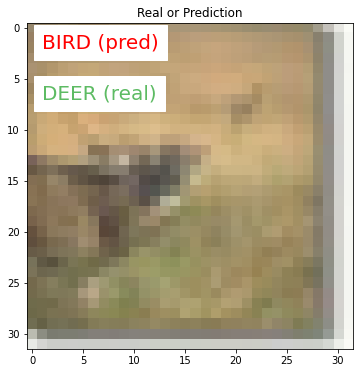

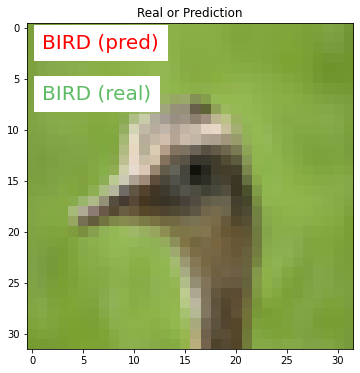

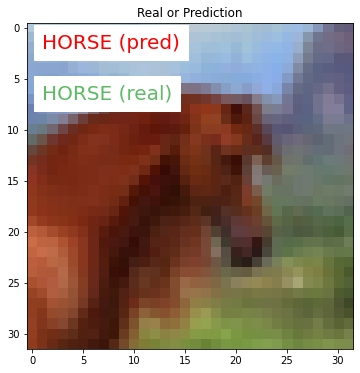

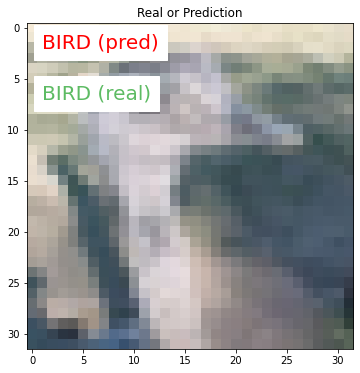

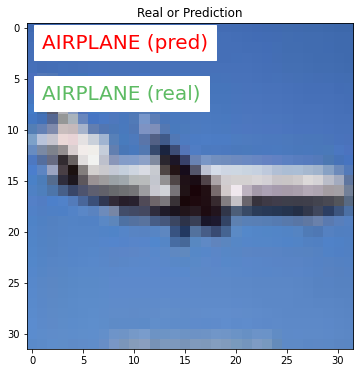

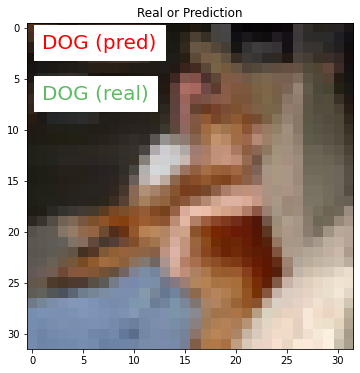

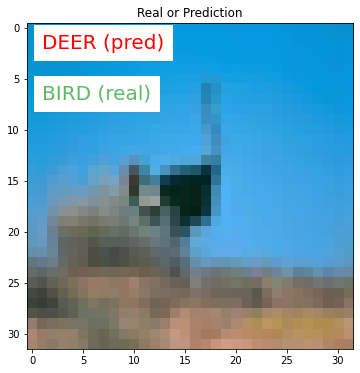

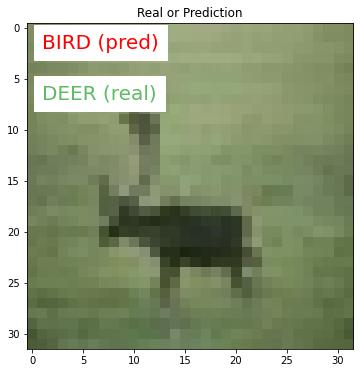

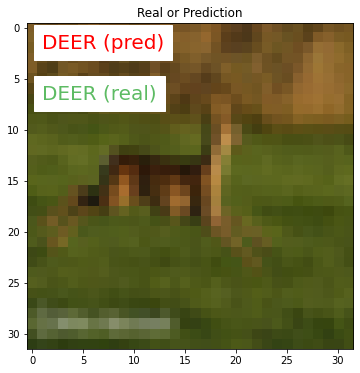

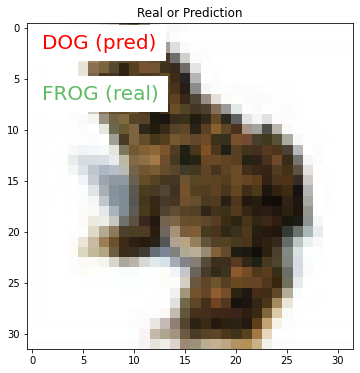

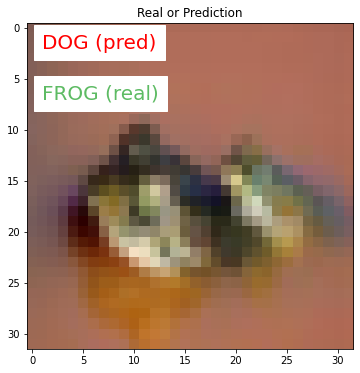

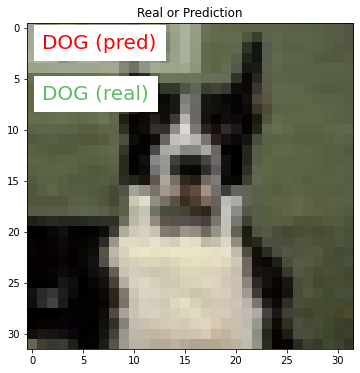

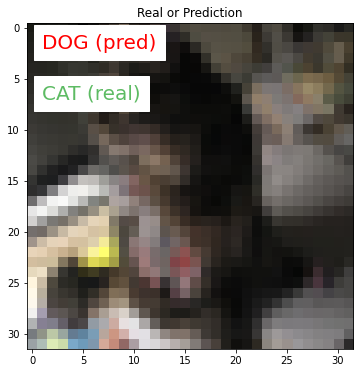

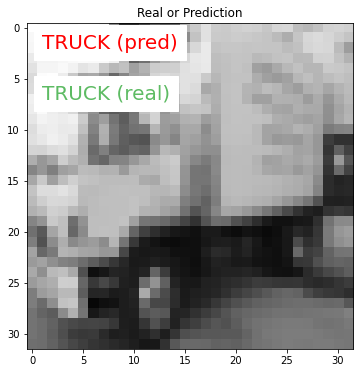

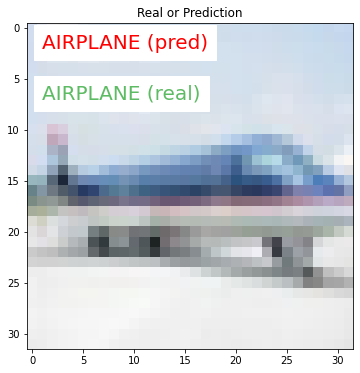

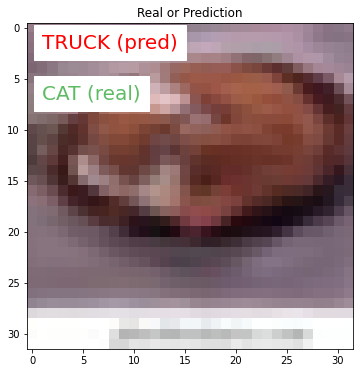

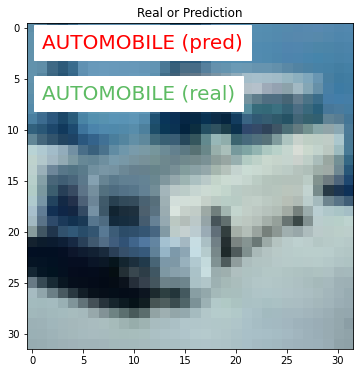

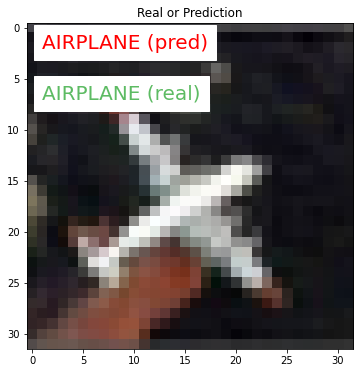

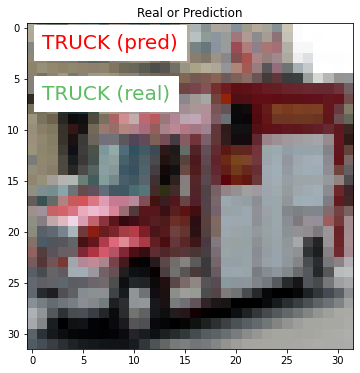

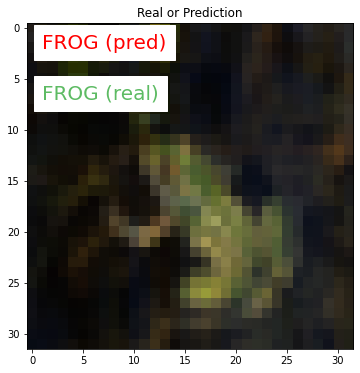

In [89]:
import random

for i in range(1000):
    r = random.randint(0, 1000)
    print("Image #:{}".format(r))

    if i == 20:
        break

    plt.figure(figsize = (15,6))
    plt.imshow(X_test[r])
    plt.title('Real or Prediction')

    plt.text(1, 2, classes[y_pred[r]].upper() + ' (pred)', color="red", backgroundcolor='white', fontsize=20)
    plt.text(1, 7, classes[y_test[r]].upper() + ' (real)', color="#5dbb63", backgroundcolor='white', fontsize=20)



In [26]:
2+2

4

<h3 style='color:purple'>Exercise</h3>

Use CNN to do handwritten digits classification using MNIST dataset. You can use this notebook as a reference:
https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/main/1_digits_recognition/digits_recognition_neural_network.ipynb

Above we used ANN for digits classification. You need to modify this code to use CNN instead. Check how accuracy improves fast with CNN and figure out how CNN can be a better choice for doing image classification compared to ANN. Once you have worked on this problem on your own, you can check my solution by clicking on this link: [Solution](https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/main/16_cnn_cifar10_small_image_classification/cnn_mnist_exercise_solution.ipynb)